<h1 style="color:white; font-size:30px; font-weight:bold; background-color:black; padding:10px; border-radius:5px;"">Social Media Sentiment Analysis (using Sentiment140)</h1> 

In [8]:
pip install pandas matplotlib seaborn nltk scikit-learn

<h4>Load and Preview the Dataset

In [9]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Online\Downloads\Brain matrix intern tasxs\2 task\training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df = df[['sentiment', 'text']]  # Keep only what we need
df.head()


,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


<h4>Convert Sentiment to Labels

In [10]:
def label_sentiment(score):
    if score == 0:
        return 'Negative'
    elif score == 4:
        return 'Positive'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment'].apply(label_sentiment)


<h4>Clean the Text (NLP Preprocessing)

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@w+|\#','', text)  # remove @ and #
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # remove special chars
    text = text.lower()
    text = " ".join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text
# Apply text cleaning
df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Online\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h4>Sentiment Visualization

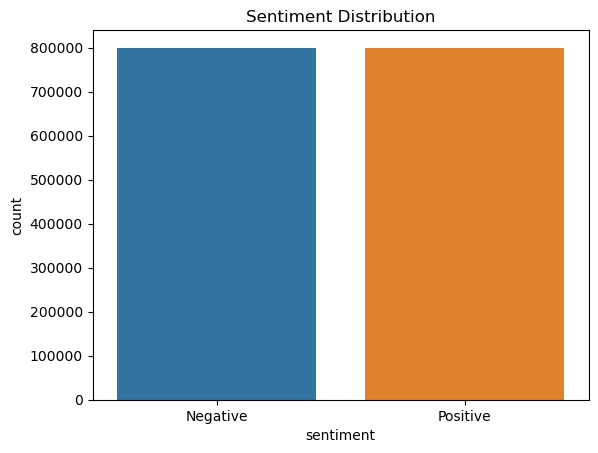

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


<h4>Word Cloud

In [21]:
!pip install wordcloud


     -------------------------------------- 299.8/299.8 kB 1.7 MB/s eta 0:00:00


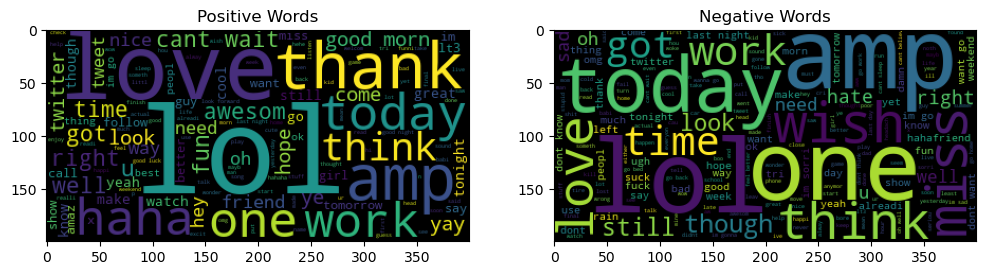

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(df[df['sentiment']=='Positive']['clean_text'])
negative_text = " ".join(df[df['sentiment']=='Negative']['clean_text'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud().generate(positive_text))
plt.title("Positive Words")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud().generate(negative_text))
plt.title("Negative Words")
plt.show()



<h4>Sentiment Classification

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.75      0.80      0.78    159575
    Positive       0.79      0.74      0.76    160425

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



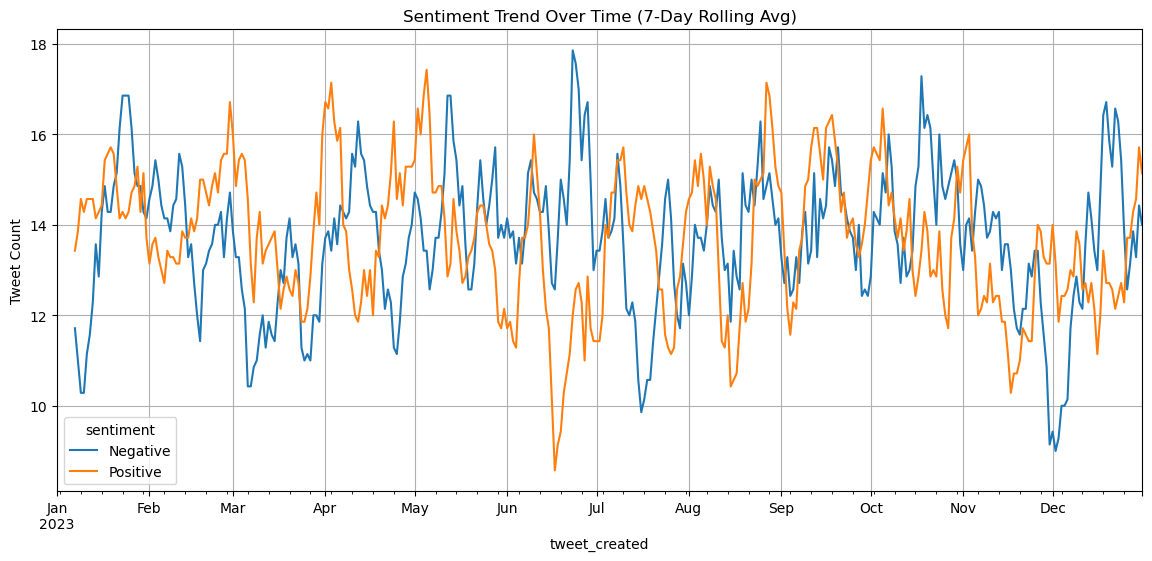

In [31]:
import numpy as np

# Reduce size for better plotting (optional)
df_sample = df.sample(10000, random_state=42).copy()

# Simulate realistic random dates
df_sample['tweet_created'] = pd.to_datetime(
    np.random.choice(pd.date_range('2023-01-01', '2023-12-31'), size=len(df_sample))
)

# Set index and resample
df_sample.set_index('tweet_created', inplace=True)
trend = df_sample.resample('D')['sentiment'].value_counts().unstack().fillna(0)

# Optional: smooth with rolling average
trend_rolling = trend.rolling(window=7).mean()

# Plot
trend_rolling.plot(figsize=(14, 6), title="Sentiment Trend Over Time (7-Day Rolling Avg)")
plt.ylabel("Tweet Count")
plt.grid(True)
plt.show()
